In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/home/alireza/anaconda3/envs/adaexam/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def create_string_list(sparsity_levels, num_experiments, exp_name, arch_name, model_name= "Bert-base"):
    string_list = []
    for n in range(num_experiments+1):
        for sparsity in sparsity_levels:
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n}")
    return string_list

def create_MHA_string_list(sparsity_levels, num_experiments, exp_name, arch_name, model_name= "Bert-base-MHA"):
    string_list = []
    for n in range(num_experiments+1):
        for sparsity in sparsity_levels:
            for head in range(4):
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} QKV")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} Transpose")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} QKT")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} Softmax")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} QKTV")
                string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H{head} Post-softmax")
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H-1 MHA")
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H-1 Condense")
            string_list.append(f"{model_name} {exp_name} {arch_name} S{sparsity} N{n} H-1 Add/Norm")
    return string_list

In [3]:

filenames = {"./stats/1May_8x8/stats_abw.txt":
                 create_string_list([0, 10, 20, 30], 5, "Block-wise", "SA8x8"),
             "./stats/1May_8x8/stats_abw2.txt":
                 create_string_list([40, 50, 60, 70, 80, 90], 5, "Block-wise","SA8x8"),
             "./stats/1May_8x8/stats_ticsat.txt":
                create_string_list([0, 10, 20, 30], 4, "Row-wise","SA8x8"),
             "./stats/1May_8x8/stats_ticsat2.txt":
                create_string_list([40, 50, 60, 70, 80, 90], 4, "Row-wise","SA8x8"),
             "././stats/27apr_16x16/stats_abw.txt":
                 create_string_list([0, 10, 20, 30], 5, "Block-wise", "SA16x16"),
             "././stats/27apr_16x16/stats_abw2.txt":
                 create_string_list([40, 50, 60, 70, 80, 90], 5, "Block-wise", "SA16x16"),
             "././stats/27apr_16x16/stats_ticsat.txt":
                create_string_list([0, 10, 20, 30], 5, "Row-wise", "SA16x16"),
             "././stats/27apr_16x16/stats_ticsat2.txt":
                create_string_list([40, 50, 60, 70, 80, 90], 5, "Row-wise", "SA16x16"),

             "./stats/4May_SIMD/stats_simd_abw.txt":
                create_string_list([0, 10, 20, 30], 3, "Block-wise", "SIMD"),
             "./stats/4May_SIMD/stats_simd_abw2.txt":
                create_string_list([40, 50, 60, 70, 80, 90], 3, "Block-wise", "SIMD"),
             "./stats/4May_SIMD/stats_simd.txt":
                 create_string_list([0, 10, 20, 30], 3, "Row-wise", "SIMD"),
             "./stats/4May_SIMD/stats_simd2.txt":
                 create_string_list([40, 50, 60, 70, 80, 90], 3, "Row-wise", "SIMD"),

             "./stats/8May_ZF/stats_vit_abw.txt":
                 create_string_list([30, 60, 90], 1, "Block-wise", "SA16x16", model_name="ViT-B32"),
             "./stats/8May_ZF/stats_vit_zf.txt":
                 create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="ViT-B32"),
             "./stats/8May_ZF/stats_bert_zf.txt":
                 create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="Bert-base"),
             "./stats/8May_ZF/stats_gpt3_abw.txt":
                 create_string_list([30, 60, 90], 1, "Block-wise", "SA16x16", model_name="GPT-3"),
             "./stats/8May_ZF/stats_gpt3_zf.txt":
                 create_string_list([30, 60, 90], 1, "ZF", "SA16x16", model_name="GPT-3"),

            "./stats/10May_MHA/stats_mha_rw.txt":
                create_MHA_string_list([0], 1, "Row-wise", "SA16x16"),
             "./stats/10May_MHA/stats_mha_bw.txt":
                create_MHA_string_list([0], 1, "Block-wise", "SA16x16"),
             "./stats/10May_MHA/stats_mha_rw_s.txt":
                create_MHA_string_list([50], 1, "Row-wise", "SA16x16"),
             "./stats/10May_MHA/stats_mha_bw_s_1.txt":
                create_MHA_string_list([50], 1, "Block-wise", "SA16x16"),
             }


feature_name = ['sim_seconds',
                'sim_ticks',
                'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                'system.cpu.dcache.overall_hits::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.dcache.overall_accesses::total',
                'system.cpu.dcache.overall_miss_rate::total',
                'system.cpu.icache.overall_hits::total',
                'system.cpu.icache.overall_misses::total',
                'system.cpu.icache.overall_accesses::total',
                'system.cpu.icache.overall_miss_rate::total',
                'system.l2.overall_hits::total',
                'system.l2.overall_misses::total',
                'system.l2.overall_accesses::total',
                'system.l2.overall_miss_rate::total',
                'system.switch_cpus.idleCycles',
                'system.switch_cpus.op_class_0::IntAlu',
                'system.switch_cpus.op_class_0::IntMult',
                'system.switch_cpus.op_class_0::IntDiv',
                'system.switch_cpus.op_class_0::MemRead',
                'system.switch_cpus.op_class_0::MemWrite',
                'system.switch_cpus.op_class_0::CusAluProcess',
                'system.switch_cpus.op_class_0::CusAluParamWrite',
                'system.switch_cpus.op_class_0::CusAluQueue',
                'system.cpu.idleCycles',
                'system.cpu.op_class_0::IntAlu',
                'system.cpu.op_class_0::IntMult',
                'system.cpu.op_class_0::IntDiv',
                'system.cpu.op_class_0::MemRead',
                'system.cpu.op_class_0::MemWrite',
                'system.cpu.op_class_0::CusAluProcess',
                'system.cpu.op_class_0::CusAluParamWrite',
                'system.cpu.op_class_0::CusAluQueue',
                'system.l2.overall_miss_latency::total',
                'system.cpu.icache.overall_miss_latency::total',
                'system.cpu.dcache.overall_miss_latency::total',
                'system.l2.overall_misses::total',
                'system.cpu.dcache.overall_misses::total',
                'system.cpu.icache.overall_misses::total'
                ]

MHA_layers = ["Query", "Key", "Value", "Transpose", "QKT", "Pre-Softmax", "Score", "Post-Softmax"]
# layers = ["{}{}".format(l, i) for i in range(1,17) for l in MHA_layers ]
# layers += ["Nan", "Projection", "Add/Norm0", "FF0", "FF1", "Add/Norm1"]


In [4]:
df = pd.DataFrame()

for filename in filenames.keys():
    layers = [""] if "MHA" in filename else ["MHA", "FF"]
    exp_list = []
    with open(filename, 'r') as kernel_file:
        lines = kernel_file.readlines()
        exp_index = 0
        for line in lines:
            if line.startswith('---------- Begin Simulation Statistics'):
                experiment = {'model': filenames[filename][exp_index // len(layers)],
                              'layer': layers[exp_index % len(layers)]}
            else:
                for k in feature_name:
                    if line.startswith(k):
                        l = line.split(k)[1]
                        l = l.split()[0]
                        experiment[k] = np.float64(l)
            if line.startswith('---------- End Simulation Statistics'):
                exp_list.append(experiment)
                exp_index += 1

                if exp_index >= len(layers) * len(filenames[filename]):
                    break

    df_kernel = pd.DataFrame(exp_list)
    df = pd.concat([df, df_kernel], axis=0, ignore_index=True)

df

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.l2.overall_miss_rate::total,system.switch_cpus.op_class_0::IntAlu,system.switch_cpus.op_class_0::IntMult,system.switch_cpus.op_class_0::IntDiv,system.switch_cpus.op_class_0::MemRead,system.switch_cpus.op_class_0::MemWrite,system.switch_cpus.op_class_0::CusAluProcess,system.switch_cpus.op_class_0::CusAluParamWrite,system.switch_cpus.op_class_0::CusAluQueue,system.switch_cpus.idleCycles
0,Bert-base Block-wise SA8x8 S0 N0,MHA,0.622594,6.225945e+11,212112.0,108016.0,7.277422e+08,1204786.0,1.782721e+10,7.289470e+08,...,0.008044,674353880.0,879109.0,3199929.0,467872155.0,261002729.0,25853952.0,786432.0,25903104.0,118732529.0
1,Bert-base Block-wise SA8x8 S0 N0,FF,0.831588,8.315883e+11,2568444.0,61833.0,1.065531e+09,381342.0,1.353774e+10,1.065913e+09,...,0.039758,936107333.0,855396.0,55046.0,684751891.0,380997665.0,38780928.0,1179648.0,38854656.0,90116495.0
2,Bert-base Block-wise SA8x8 S10 N0,MHA,0.584061,5.840609e+11,223971.0,114611.0,6.756531e+08,1212225.0,1.818135e+10,6.768654e+08,...,0.009136,630435109.0,878459.0,3199756.0,434509283.0,242340483.0,23941416.0,786432.0,23986932.0,117105434.0
3,Bert-base Block-wise SA8x8 S10 N0,FF,0.754992,7.549918e+11,2043855.0,66967.0,9.637261e+08,370692.0,1.281915e+10,9.640968e+08,...,0.040434,849840048.0,854200.0,54731.0,619470637.0,344509438.0,35046328.0,1179648.0,35112956.0,84498176.0
4,Bert-base Block-wise SA8x8 S20 N0,MHA,0.544367,5.443673e+11,226054.0,122875.0,6.229938e+08,1199910.0,1.787221e+10,6.241937e+08,...,0.008906,586047988.0,877901.0,3199595.0,400757725.0,223473221.0,22005736.0,786432.0,22047572.0,113827034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,Bert-base-MHA Block-wise SA16x16 S50 N0 H3 QKTV,,0.011447,1.144669e+10,53438.0,15520.0,6.155747e+06,52574.0,2.756968e+09,6.208321e+06,...,0.204074,9246633.0,76380.0,387.0,3928116.0,2311387.0,69376.0,8192.0,208512.0,9404252.0
634,Bert-base-MHA Block-wise SA16x16 S50 N0 H3 Pos...,,0.003953,3.952794e+09,27052.0,10226.0,1.118643e+06,30511.0,1.249922e+09,1.149154e+06,...,0.209707,2629305.0,23798.0,333.0,732628.0,462748.0,0.0,0.0,0.0,4276236.0
635,Bert-base-MHA Block-wise SA16x16 S50 N0 H-1 MHA,,0.199384,1.993845e+11,217101.0,97303.0,2.053773e+08,534418.0,8.748516e+09,2.059117e+08,...,0.033920,222450757.0,20090.0,3146935.0,131432303.0,74525696.0,3532214.0,638976.0,10616193.0,31526363.0
636,Bert-base-MHA Block-wise SA16x16 S50 N0 H-1 Co...,,0.003255,3.255187e+09,30581.0,11925.0,8.161900e+05,23965.0,7.250380e+08,8.401550e+05,...,0.187851,4021579.0,3612.0,295.0,606682.0,285727.0,0.0,147456.0,0.0,2664520.0


In [17]:
# df.to_csv('./output/load_skip_data.csv', sep=',')

In [4]:
prunable_layers = ["Query", "Key", "Value", "Projection", "FF0", "FF1"]

In [19]:
df_encoder_0 = df[df['model'] == "Encoder sparsity 0"].copy()
df_encoder_0['prunable'] = df_encoder_0['layer']\
    .apply(lambda x: (x in prunable_layers) | (x[:-1] in prunable_layers))
df_encoder_0.groupby('prunable')['sim_seconds'].sum()


Series([], Name: sim_seconds, dtype: float64)

In [20]:
df_decoder_0 = df[df['model'] == "Decoder sparsity 0"].copy()
df_decoder_0_extra = df_decoder_0[df_decoder_0['layer'].apply(lambda x: x[:-1] in ["Query", "Key", "Value", "Transpose", "QKT", "Pre-Softmax", "Score", "Post-Softmax"])]

df_decoder_0 = pd.concat([df_decoder_0, df_decoder_0_extra], ignore_index=True)
df_decoder_0['prunable'] = df_decoder_0['layer']\
    .apply(lambda x: (x in prunable_layers) | (x[:-1] in prunable_layers))
df_decoder_0.groupby('prunable')['sim_seconds'].sum()

Series([], Name: sim_seconds, dtype: float64)

# Memory rearranged

<Figure size 1152x1152 with 0 Axes>

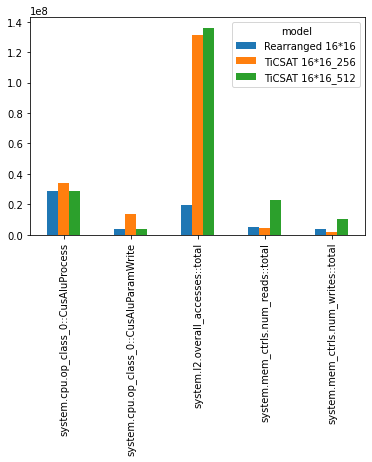

In [26]:
gemm_MHA_layers = ["Query", "Key", "Value", "QKT", "Score"]
gemm_layers = ["{}{}".format(l, i) for i in range(1,17) for l in gemm_MHA_layers ]
gemm_layers += ["Projection", "FF0", "FF1"]

non_gem_layers = [x for x in layers if x not in gemm_layers]

df['is_gemm'] = df['layer'].apply(lambda x: x in gemm_layers)
df_compare = df.groupby(['model'])[[ #'sim_seconds',
                                  # 'system.cpu.dcache.overall_accesses::total',
                                  'system.cpu.op_class_0::CusAluProcess',
                                    'system.cpu.op_class_0::CusAluParamWrite',
                                  'system.l2.overall_accesses::total',
                                  'system.mem_ctrls.num_reads::total',
                'system.mem_ctrls.num_writes::total',
                                  ]].sum()

# df_compare.reset_index().pivot(index='model', columns='is_gemm').plot.bar()
plt.figure(figsize=(16,16))
df_compare.transpose().plot.bar()
# plt.tight_layout()
plt.savefig('output/memory_rearranged_mem.png')

In [25]:
df_compare = df.groupby(['model'])['sim_seconds'].sum()

In [23]:
df_compare

model
Rearranged 16*16     6.704072
TiCSAT 16*16_256    10.361356
TiCSAT 16*16_512    12.048685
Name: sim_seconds, dtype: float64

# Load-skip Sparsity

In [64]:
df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['sim_seconds'].sum()

model
Rearrange 16*16 Sparsity 0      6.949713
Rearrange 16*16 Sparsity 10     6.797845
Rearrange 16*16 Sparsity 20     6.699286
Rearrange 16*16 Sparsity 30     6.655673
Rearrange 16*16 Sparsity 40     6.507226
Rearrange 16*16 Sparsity 50     6.380063
Rearrange 16*16 Sparsity 60     6.248997
Rearrange 16*16 Sparsity 70     6.088848
Rearrange 16*16 Sparsity 80     5.933693
Rearrange 16*16 Sparsity 90     5.773522
TiCSAT 16*16 Sparsity 0        10.348878
TiCSAT 16*16 Sparsity 10        9.882017
TiCSAT 16*16 Sparsity 20        9.514620
TiCSAT 16*16 Sparsity 30        9.155397
TiCSAT 16*16 Sparsity 40        8.708290
TiCSAT 16*16 Sparsity 50        8.280271
TiCSAT 16*16 Sparsity 60        7.859124
TiCSAT 16*16 Sparsity 70        7.363610
TiCSAT 16*16 Sparsity 80        6.910815
TiCSAT 16*16 Sparsity 90        6.441591
Name: sim_seconds, dtype: float64

# Zero-free Sparsity

In [4]:
df['sparsity'] = df['model'].apply(lambda x: int(x.split(' ')[-1]))
df.head()

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,...,system.cpu.icache.overall_misses::total,system.cpu.icache.overall_miss_latency::total,system.cpu.icache.overall_accesses::total,system.cpu.icache.overall_miss_rate::total,system.l2.overall_hits::total,system.l2.overall_misses::total,system.l2.overall_miss_latency::total,system.l2.overall_accesses::total,system.l2.overall_miss_rate::total,sparsity
0,Rearrange 16*16 Sparsity 90,MHA,0.747375,7.473749e+11,190184.0,126874.0,476479533.0,38861.0,4197828.0,116294958.0,...,193532.0,6.716274e+09,210155734.0,0.000921,1598501.0,190187.0,2.249178e+10,1788688.0,0.106328,90
1,Rearrange 16*16 Sparsity 90,Projection,0.058092,5.809175e+10,55755.0,27443.0,36711314.0,5468.0,573.0,8593760.0,...,44768.0,1.965082e+09,14949869.0,0.002995,126207.0,55759.0,6.424546e+09,181966.0,0.306425,90
2,Rearrange 16*16 Sparsity 90,Add/Norm0,0.039299,3.929856e+10,40715.0,21364.0,16871738.0,1087517.0,35320.0,4835978.0,...,35753.0,1.622628e+09,8544682.0,0.004184,361824.0,40719.0,4.717175e+09,402543.0,0.101154,90
3,Rearrange 16*16 Sparsity 90,FF0,0.218435,2.184350e+11,232034.0,175575.0,141061816.0,9879.0,1236.0,32773174.0,...,76533.0,2.882127e+09,57143722.0,0.001339,260700.0,232037.0,2.586496e+10,492737.0,0.470915,90
4,Rearrange 16*16 Sparsity 90,FF1,0.209697,2.096975e+11,149774.0,45510.0,140297339.0,7869.0,1217.0,32588724.0,...,52986.0,2.221566e+09,56718833.0,0.000934,323490.0,149778.0,1.755890e+10,473268.0,0.316476,90


In [4]:
df_sim_seconds = df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['sim_seconds'].sum()
df_sim_seconds

model
Load-skip 16*16 ViT 4kB_128kB Sparsity 40                  0.579612
Load-skip 16*16 ViT 4kB_128kB Sparsity 90                  0.213500
O3 Load-skip 16*16 Sparsity 40                             2.328392
O3 Load-skip 16*16 Sparsity 90                             0.846262
O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 40             2.741566
O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 90             1.032362
O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sparsity 40    2.047061
O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sparsity 90    0.731497
O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sparsity 40    2.055805
O3 Prefetch load-skip 16*16 lBert 4kB_128kB Sparsity 90    0.761834
O3 Zero-free 16*16 Sparsity 40                             2.298822
O3 Zero-free 16*16 Sparsity 90                             0.801542
O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 40             2.729037
O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 90             0.989339
Rearrange 16*16 Sparsity 0                

In [8]:
df[df['layer'].apply(lambda x: x.startswith(''))].groupby('model')['system.cpu.dcache.overall_accesses::total'].sum()

model
O3 Zero-free 16*16 Sparsity 40    2.298822
O3 Zero-free 16*16 Sparsity 90    0.801542
Rearrange 16*16 Sparsity 0        6.254669
Rearrange 16*16 Sparsity 10       5.712859
Rearrange 16*16 Sparsity 20       5.166207
Rearrange 16*16 Sparsity 30       4.602433
Rearrange 16*16 Sparsity 40       4.056336
Rearrange 16*16 Sparsity 50       3.491527
Rearrange 16*16 Sparsity 60       2.959746
Rearrange 16*16 Sparsity 70       2.390253
Rearrange 16*16 Sparsity 80       1.859953
Rearrange 16*16 Sparsity 90       1.312524
Zero-free 16*16 Sparsity 0        6.218148
Zero-free 16*16 Sparsity 10       5.672922
Zero-free 16*16 Sparsity 20       5.122899
Zero-free 16*16 Sparsity 30       4.556787
Zero-free 16*16 Sparsity 40       4.008140
Zero-free 16*16 Sparsity 50       3.439999
Zero-free 16*16 Sparsity 60       2.904682
Zero-free 16*16 Sparsity 70       2.333509
Zero-free 16*16 Sparsity 80       1.798609
Zero-free 16*16 Sparsity 90       1.250264
Name: sim_seconds, dtype: float64

<BarContainer object of 2 artists>

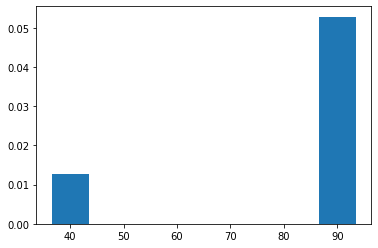

In [8]:
ratio = []
for i in range(40, 100, 50):
    load_skip = df_sim_seconds.loc['O3 Load-skip 16*16 Sparsity {}'.format(i)]
    zero_free = df_sim_seconds.loc['O3 Zero-free 16*16 Sparsity {}'.format(i)]
    ratio.append((load_skip - zero_free)/(load_skip))

plt.bar(np.arange(40, 100, 50), height=ratio, width=7)

In [5]:
df[(df['model'].apply(lambda  x : x.endswith('90')) ) & (df['layer'] == 'FF0')]

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.op_class_0::IntAlu,system.cpu.op_class_0::IntMult,system.cpu.op_class_0::IntDiv,system.cpu.op_class_0::MemRead,...,system.cpu.icache.overall_hits::total,system.cpu.icache.overall_misses::total,system.cpu.icache.overall_miss_latency::total,system.cpu.icache.overall_accesses::total,system.cpu.icache.overall_miss_rate::total,system.l2.overall_hits::total,system.l2.overall_misses::total,system.l2.overall_miss_latency::total,system.l2.overall_accesses::total,system.l2.overall_miss_rate::total
3,Rearrange 16*16 Sparsity 90,FF0,0.218435,2.184350e+11,232034.0,175575.0,141061816.0,9879.0,1236.0,32773174.0,...,57067189.0,76533.0,2.882127e+09,57143722.0,0.001339,260700.0,232037.0,2.586496e+10,492737.0,0.470915
63,Zero-free 16*16 Sparsity 90,FF0,0.197777,1.977771e+11,148950.0,151674.0,125516365.0,9581.0,1162.0,31848681.0,...,51811741.0,68801.0,2.665177e+09,51880542.0,0.001326,252492.0,148954.0,1.790863e+10,401446.0,0.371044
123,O3 Zero-free 16*16 Sparsity 90,FF0,0.117967,1.179666e+11,150645.0,152656.0,47660230.0,8217.0,822.0,31821616.0,...,12137543.0,64395.0,2.577683e+09,12201938.0,0.005277,239673.0,150650.0,1.772165e+10,390323.0,0.385962
135,O3 Load-skip 16*16 Sparsity 90,FF0,0.139336,1.393360e+11,275714.0,230289.0,63221264.0,8656.0,927.0,32750604.0,...,14724146.0,65061.0,2.485386e+09,14789207.0,0.004399,160015.0,275717.0,2.949167e+10,435732.0,0.632767
147,Load-skip 16*16 ViT 4kB_128kB Sparsity 90,FF0,0.058653,5.865308e+10,142941.0,45369.0,34328839.0,5066.0,580.0,4700219.0,...,11840835.0,132716.0,5.831729e+09,11973551.0,0.011084,160705.0,142945.0,1.583002e+10,303650.0,0.470756
159,O3 Load-skip 16*16 lBert 4kB_128kB Sparsity 90,FF0,0.156644,1.566438e+11,342809.0,249703.0,63242880.0,8963.0,992.0,32756473.0,...,14424199.0,307840.0,1.244577e+10,14732039.0,0.020896,628664.0,342813.0,3.848904e+10,971477.0,0.352878
171,Zero-free 16*16 ViT 4kB_128kB Sparsity 90,FF0,0.037569,3.756926e+10,77600.0,40962.0,18814613.0,4717.0,508.0,3773293.0,...,7537754.0,129557.0,5.504156e+09,7667311.0,0.016897,162958.0,77603.0,9.123062e+09,240561.0,0.322592
183,O3 Zero-free 16*16 lBert 4kB_128kB Sparsity 90,FF0,0.140733,1.407332e+11,306544.0,257326.0,47697215.0,8764.0,948.0,31832003.0,...,11841056.0,305734.0,1.256630e+10,12146790.0,0.025170,606747.0,306547.0,3.465664e+10,913294.0,0.335650
195,Upper Bound 16*16 ViT 4kB_128kB Sparsity 90,FF0,0.036763,3.676312e+10,68106.0,38765.0,18934738.0,4862.0,526.0,3664231.0,...,7680606.0,130382.0,5.535614e+09,7810988.0,0.016692,162799.0,68109.0,7.809072e+09,230908.0,0.294962
207,O3 Prefetch Zero-free 16*16 lBert 4kB_128kB Sp...,FF0,0.100059,1.000594e+11,198698.0,156195.0,47647410.0,7969.0,745.0,31817913.0,...,12114056.0,60445.0,1.895579e+09,12174501.0,0.004965,388959.0,39655.0,5.779363e+09,428614.0,0.092519


# Paper Results

In [5]:
df['transformer_model'] = df['model'].apply(lambda x: x.split(' ')[0])
df['acceleration_method'] = df['model'].apply(lambda x: x.split(' ')[1])
df['architecture'] = df['model'].apply(lambda x: x.split(' ')[2])
df['sparsity'] = df['model'].apply(lambda x: int(x.split(' ')[3][1:]))
df['iteration'] = df['model'].apply(lambda x: int(x.split(' ')[4][1:]))
df.head()

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.switch_cpus.op_class_0::MemWrite,system.switch_cpus.op_class_0::CusAluProcess,system.switch_cpus.op_class_0::CusAluParamWrite,system.switch_cpus.op_class_0::CusAluQueue,system.switch_cpus.idleCycles,transformer_model,acceleration_method,architecture,sparsity,iteration
0,Bert-base Block-wise SA8x8 S0 N0,MHA,0.622594,6.225945e+11,212112.0,108016.0,7.277422e+08,1204786.0,1.782721e+10,7.289470e+08,...,261002729.0,25853952.0,786432.0,25903104.0,118732529.0,Bert-base,Block-wise,SA8x8,0,0
1,Bert-base Block-wise SA8x8 S0 N0,FF,0.831588,8.315883e+11,2568444.0,61833.0,1.065531e+09,381342.0,1.353774e+10,1.065913e+09,...,380997665.0,38780928.0,1179648.0,38854656.0,90116495.0,Bert-base,Block-wise,SA8x8,0,0
2,Bert-base Block-wise SA8x8 S10 N0,MHA,0.584061,5.840609e+11,223971.0,114611.0,6.756531e+08,1212225.0,1.818135e+10,6.768654e+08,...,242340483.0,23941416.0,786432.0,23986932.0,117105434.0,Bert-base,Block-wise,SA8x8,10,0
3,Bert-base Block-wise SA8x8 S10 N0,FF,0.754992,7.549918e+11,2043855.0,66967.0,9.637261e+08,370692.0,1.281915e+10,9.640968e+08,...,344509438.0,35046328.0,1179648.0,35112956.0,84498176.0,Bert-base,Block-wise,SA8x8,10,0
4,Bert-base Block-wise SA8x8 S20 N0,MHA,0.544367,5.443673e+11,226054.0,122875.0,6.229938e+08,1199910.0,1.787221e+10,6.241937e+08,...,223473221.0,22005736.0,786432.0,22047572.0,113827034.0,Bert-base,Block-wise,SA8x8,20,0


## Block-pruned Accelerators

In [69]:
condition = (df['acceleration_method'] == 'Row-wise')
block_pruned_accelerators_df = df[condition]

execution_time_df = block_pruned_accelerators_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')
execution_time_df.head()

,transformer_model,acceleration_method,architecture,sparsity,iteration,execution_time
0,Bert-base,Row-wise,SA16x16,0,0,1.812998
1,Bert-base,Row-wise,SA16x16,0,1,1.815562
2,Bert-base,Row-wise,SA16x16,0,2,1.822823
3,Bert-base,Row-wise,SA16x16,0,3,1.819921
4,Bert-base,Row-wise,SA16x16,0,4,1.824092


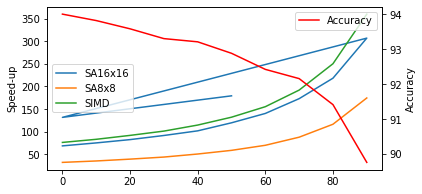

In [70]:
mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
mean_exec_time_df['speed-up'] = 125.0/mean_exec_time_df['execution_time']

grouped = mean_exec_time_df.groupby('architecture')
# Plot the data
fig, ax = plt.subplots(figsize=(6,3))
for name, group in grouped:
    ax.plot(group['sparsity'], group['speed-up'], label=name)
ax.set_ylabel('Speed-up')
# Additional code for accuracy line
accuracy = [94, 93.816, 93.58, 93.3, 93.208, 92.88, 92.42, 92.156, 91.412, 89.76]  # Example accuracy values
ax2 = ax.twinx()  # Create secondary y-axis
ax2.plot(range(0, 100, 10), accuracy, 'r', label='Accuracy')  # Plot the accuracy line
ax2.set_ylabel('Accuracy')  # Set label for secondary y-axis

ax.legend(loc='center left')
ax2.legend(loc='upper right')  # Add legend for accuracy line

plt.savefig('output/block_pruned_accelerators.png', bbox_inches='tight', dpi=300)

## All-block-wise

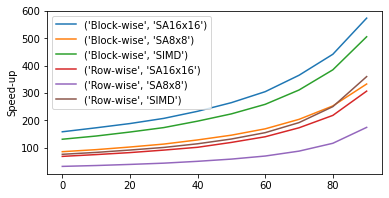

In [6]:
condition = (df['acceleration_method'].isin(['Row-wise', 'Block-wise'])) & (df['transformer_model'] == 'Bert-base')
abw_df = df[condition]

execution_time_df = abw_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')

mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
mean_exec_time_df['speed-up'] = 125.0/mean_exec_time_df['execution_time']

grouped = mean_exec_time_df.groupby(['acceleration_method', 'architecture'])
# Plot the data
fig, ax = plt.subplots(figsize=(6,3))
for name, group in grouped:
    ax.plot(group['sparsity'], group['speed-up'], label=name)
ax.set_ylabel('Speed-up')
ax.legend(loc='upper left')
plt.savefig('output/Block-wise.png', bbox_inches='tight', dpi=300)


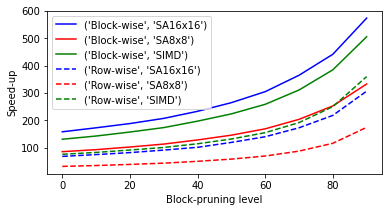

In [28]:
import matplotlib.pyplot as plt

condition = (df['acceleration_method'].isin(['Row-wise', 'Block-wise'])) & (df['transformer_model'] == 'Bert-base')
abw_df = df[condition]

execution_time_df = abw_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')

mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
mean_exec_time_df['speed-up'] = 125.0 / mean_exec_time_df['execution_time']

grouped = mean_exec_time_df.groupby(['acceleration_method', 'architecture'])

# Define colors for each architecture
architecture_colors = {'SA16x16': 'blue', 'SA8x8': 'red', 'SIMD': 'green'}

# Plot the data
fig, ax = plt.subplots(figsize=(6, 3))
for name, group in grouped:
    architecture = name[1]
    linestyle = '--' if name[0] == 'Row-wise' else '-'
    color = architecture_colors.get(architecture, 'black')
    ax.plot(group['sparsity'], group['speed-up'], linestyle=linestyle, color=color, label=name)

ax.set_ylabel('Speed-up')
ax.set_xlabel('Block-pruning level')
ax.legend(loc='upper left')
plt.savefig('./output/Block-wise.png', bbox_inches='tight', dpi=300)


In [29]:
abw_df = abw_df.groupby('model').aggregate('sum', numeric_only=True).reset_index()
abw_df['transformer_model'] = abw_df['model'].apply(lambda x: x.split(' ')[0])
abw_df['acceleration_method'] = abw_df['model'].apply(lambda x: x.split(' ')[1])
abw_df['architecture'] = abw_df['model'].apply(lambda x: x.split(' ')[2])
abw_df['sparsity'] = abw_df['model'].apply(lambda x: int(x.split(' ')[3][1:]))
abw_df['iteration'] = abw_df['model'].apply(lambda x: int(x.split(' ')[4][1:]))

abw_df['system.mem_ctrls.overall_accesses::total'] = abw_df['system.mem_ctrls.num_reads::total'] + abw_df['system.mem_ctrls.num_writes::total']

abw_df.head()

,model,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,system.cpu.dcache.overall_miss_rate::total,...,system.switch_cpus.op_class_0::CusAluProcess,system.switch_cpus.op_class_0::CusAluParamWrite,system.switch_cpus.op_class_0::CusAluQueue,system.switch_cpus.idleCycles,sparsity,iteration,transformer_model,acceleration_method,architecture,system.mem_ctrls.overall_accesses::total
0,Bert-base Block-wise SA16x16 S0 N0,0.785289,7.852895e+11,1569012.0,163402.0,912683523.0,863976.0,1.694838e+10,913547499.0,0.002117,...,16650240.0,1966080.0,50042880.0,117925753.0,0,0,Bert-base,Block-wise,SA16x16,1732414.0
1,Bert-base Block-wise SA16x16 S0 N1,0.788901,7.889008e+11,1887758.0,162013.0,912623654.0,883385.0,2.086640e+10,913507039.0,0.002167,...,16650240.0,1966080.0,50042880.0,126291691.0,0,1,Bert-base,Block-wise,SA16x16,2049771.0
2,Bert-base Block-wise SA16x16 S0 N2,0.789966,7.899656e+11,1715904.0,174086.0,912627391.0,890424.0,2.088345e+10,913517815.0,0.002184,...,16650240.0,1966080.0,50042880.0,128628897.0,0,2,Bert-base,Block-wise,SA16x16,1889990.0
3,Bert-base Block-wise SA16x16 S0 N3,0.790312,7.903122e+11,1938770.0,165222.0,912603805.0,908878.0,2.229575e+10,913512683.0,0.002214,...,16650240.0,1966080.0,50042880.0,129398533.0,0,3,Bert-base,Block-wise,SA16x16,2103992.0
4,Bert-base Block-wise SA16x16 S0 N4,0.789538,7.895381e+11,1722922.0,163895.0,912597439.0,908114.0,2.063418e+10,913505553.0,0.002216,...,16650240.0,1966080.0,50042880.0,127682189.0,0,4,Bert-base,Block-wise,SA16x16,1886817.0


In [32]:
column_mapping = {
    'system.cpu.dcache.overall_accesses::total' : 'D-cache accesses',
    'system.cpu.icache.overall_accesses::total' : 'I-cache accesses',
    'system.cpu.dcache.overall_misses::total'   : 'D-cache misses',
    'system.cpu.icache.overall_misses::total'   : 'I-cache misses',
     'system.l2.overall_accesses::total'        : 'L2 accesses',
    'system.mem_ctrls.overall_accesses::total'  : 'Main memory accesses',
    # Add more mappings as needed
}

# Rename the columns using the dictionary
abw_df = abw_df.rename(columns=column_mapping)

columns = [
    'D-cache accesses',
'I-cache accesses',
'D-cache misses',
'I-cache misses',
'L2 accesses',
'Main memory accesses',
               ]

/tmp/ipykernel_5648/2218914158.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_values = filtered_df.groupby(['acceleration_method']).mean().reset_index()
/tmp/ipykernel_5648/2218914158.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_values = filtered_df.groupby(['acceleration_method']).std().reset_index()


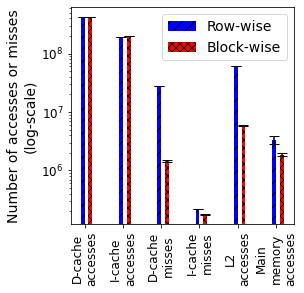

In [50]:
import matplotlib.pyplot as plt

# Filter the rows based on the specified conditions
condition = (abw_df['sparsity'] == 0) & (abw_df['architecture'] == 'SIMD') & (abw_df['transformer_model'] == 'Bert-base')
filtered_df = abw_df[condition]

# Calculate the average values based on 'iteration'
avg_values = filtered_df.groupby(['acceleration_method']).mean().reset_index()
std_values = filtered_df.groupby(['acceleration_method']).std().reset_index()


# Get the values for 'Row-wise' and 'Block-wise' acceleration methods
row_wise_values = avg_values[avg_values['acceleration_method'] == 'Row-wise']
block_wise_values = avg_values[avg_values['acceleration_method'] == 'Block-wise']
row_wise_std = std_values[std_values['acceleration_method'] == 'Row-wise']
block_wise_std = std_values[std_values['acceleration_method'] == 'Block-wise']


# Plot the data
fig, ax = plt.subplots(figsize=(4, 4))

# Set the bar width and positions
bar_width = 0.1
bar_positions = range(1)


# Set color and hatch patterns for 'Row-wise' and 'Block-wise'
row_wise_color = 'blue'
block_wise_color = 'red'
row_wise_hatch = '//'
block_wise_hatch = 'xxx'

# Plot the bars for each column in column_names
for i, column_name in enumerate(columns):
    # Plot the bars for 'Row-wise' acceleration method
    ax.bar([pos + i for pos in bar_positions], row_wise_values[column_name], yerr=row_wise_std[column_name], capsize=5, width=bar_width, label='Row-wise' if i == 0 else '', color=row_wise_color, hatch=row_wise_hatch)

    # Plot the bars for 'Block-wise' acceleration method
    ax.bar([pos + i + 0.2 for pos in bar_positions], block_wise_values[column_name], width=bar_width,  yerr=block_wise_std[column_name], capsize=5, label='Block-wise' if i == 0 else '', color=block_wise_color, hatch=block_wise_hatch)

# Set the x-axis labels based on 'iteration'
ax.set_xticks([pos + bar_width / 2 for pos in range(len(columns))])
ax.set_xticklabels([x.replace(" ", "\n") for x in columns], rotation=90, fontsize=14)

# Set the y-axis label
ax.set_ylabel('Number of accesses or misses\n(log-scale)', fontsize=14)

ax.set_yscale('log')

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(fontsize=14)

plt.savefig('./output/SIMD_BW_mem.png', bbox_inches='tight', dpi=300)

## Acceleration Methods

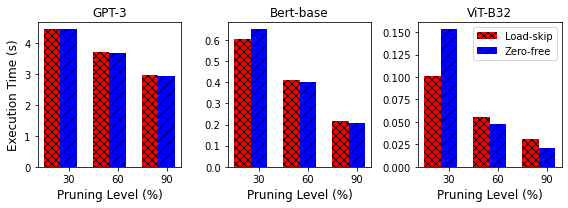

In [87]:
condition = (df['acceleration_method'].isin(['ZF', 'Block-wise'])) & (df['architecture'] == 'SA16x16') & (df['sparsity'].isin([30, 60, 90]))
zf_df = df[condition]

execution_time_df = zf_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity', 'iteration'])['sim_seconds'].sum().reset_index(name='execution_time')

mean_exec_time_df = execution_time_df.groupby(['transformer_model', 'acceleration_method', 'architecture', 'sparsity'])['execution_time'].mean().reset_index(name='execution_time')
#
# mean_exec_time_df = mean_exec_time_df[mean_exec_time_df['transformer_model'] == 'Bert-base']
# Plot the data
grouped = mean_exec_time_df.groupby(['transformer_model'])

# Plot the data
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

x = np.arange(6)

method_rename = {"Block-wise": "Load-skip",
                 "ZF": "Zero-free"}

# Define color and hatch patterns for 'Block-wise' and 'Zero-free'
block_wise_color = 'red'
zero_free_color = 'blue'
zero_free_hatch = '//'
block_wise_hatch = 'xxx'

# Loop through each transformer_model
for i, model in enumerate(['GPT-3','Bert-base', 'ViT-B32']):
    # Get the corresponding data for the current model
    model_data = mean_exec_time_df[mean_exec_time_df['transformer_model'] == model]

    # Set the subplot for the current model
    ax = axs[i]
    handles = []
    labels = []

    # Loop through each sparsity value
    for j, sparsity in enumerate([30, 60, 90]):
        # Loop through each acceleration method
        for k, method in enumerate(['Block-wise', 'ZF']):
            # Get the corresponding data for the current sparsity and acceleration method
            method_data = model_data[(model_data['sparsity'] == sparsity) & (model_data['acceleration_method'] == method)]

            # Set the x position for the current bar
            curr_x = x[j]*0.6 + (k - 1) * 0.2

            # Set color and hatch pattern based on the method
            color = block_wise_color if method == 'Block-wise' else zero_free_color
            hatch = block_wise_hatch if method == 'Block-wise' else zero_free_hatch

            # Plot the bar
            bar = ax.bar(curr_x, method_data['execution_time'], width=0.2, label=f"{method_rename[method]}", color=color, hatch=hatch)
            handles.append(bar)
            labels.append(f"{method_rename[method]}")

    # Set the x-axis labels and title for each subplot
    ax.set_xticks([0, 0.6, 1.2])
    ax.set_xticklabels([30, 60, 90], fontsize=10)  # Increase font size for x-axis labels
    ax.set_xlabel('Pruning Level (%)', fontsize=12)  # Increase font size for x-axis label
    ax.set_title(model, fontsize=12)  # Increase font size for subplot title
    if i == 0:
        ax.set_ylabel('Execution Time (s)', fontsize=12)  # Increase font size for y-axis label
    if i == 2:
        ax.legend(handles[:2], labels[:2], loc='upper right', fontsize=10)

# Increase font size for tick labels
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust spacing between subplots
fig.tight_layout()

plt.savefig('output/acceleration_methods.png', bbox_inches='tight', dpi=300)

In [88]:
# columns = zf_df.columns[4:-5]
zf_df['system.mem_ctrls.overall_accesses::total'] = zf_df['system.mem_ctrls.num_reads::total'] + zf_df['system.mem_ctrls.num_writes::total']

zf_df['system.switch_cpus.op_class_0::CusAluProcessQueue'] = zf_df['system.switch_cpus.op_class_0::CusAluProcess']+ zf_df['system.switch_cpus.op_class_0::CusAluQueue']

column_mapping = {
    'system.cpu.dcache.overall_accesses::total' : 'D-cache accesses',
    'system.cpu.icache.overall_accesses::total' : 'I-cache accesses',
    'system.cpu.dcache.overall_misses::total'   : 'D-cache misses',
    'system.cpu.icache.overall_misses::total'   : 'I-cache misses',
     'system.l2.overall_accesses::total'        : 'L2 accesses',
    'system.mem_ctrls.overall_accesses::total'  : 'Main memory accesses',
    'system.switch_cpus.op_class_0::CusAluProcessQueue': 'SA process',
       'system.switch_cpus.op_class_0::CusAluParamWrite': 'SA load',
}

# Rename the columns using the dictionary
zf_df = zf_df.rename(columns=column_mapping)

columns = [
    'D-cache accesses',
'I-cache accesses',
'D-cache misses',
'I-cache misses',
'L2 accesses',
'Main memory accesses',
    'SA process',
    'SA load']


/tmp/ipykernel_5648/3664047380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zf_df['system.mem_ctrls.overall_accesses::total'] = zf_df['system.mem_ctrls.num_reads::total'] + zf_df['system.mem_ctrls.num_writes::total']
/tmp/ipykernel_5648/3664047380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zf_df['system.switch_cpus.op_class_0::CusAluProcessQueue'] = zf_df['system.switch_cpus.op_class_0::CusAluProcess']+ zf_df['system.switch_cpus.op_class_0::CusAluQueue']


In [89]:
zf_df.columns

Index(['model', 'layer', 'sim_seconds', 'sim_ticks',
       'system.mem_ctrls.num_reads::total',
       'system.mem_ctrls.num_writes::total',
       'system.cpu.dcache.overall_hits::total', 'D-cache misses',
       'system.cpu.dcache.overall_miss_latency::total', 'D-cache accesses',
       'system.cpu.dcache.overall_miss_rate::total',
       'system.cpu.icache.overall_hits::total', 'I-cache misses',
       'system.cpu.icache.overall_miss_latency::total', 'I-cache accesses',
       'system.cpu.icache.overall_miss_rate::total',
       'system.l2.overall_hits::total', 'system.l2.overall_misses::total',
       'system.l2.overall_miss_latency::total', 'L2 accesses',
       'system.l2.overall_miss_rate::total',
       'system.switch_cpus.op_class_0::IntAlu',
       'system.switch_cpus.op_class_0::IntMult',
       'system.switch_cpus.op_class_0::IntDiv',
       'system.switch_cpus.op_class_0::MemRead',
       'system.switch_cpus.op_class_0::MemWrite',
       'system.switch_cpus.op_class_0::Cu

/tmp/ipykernel_5648/1686559117.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_values = filtered_df.groupby(['acceleration_method']).mean().reset_index()


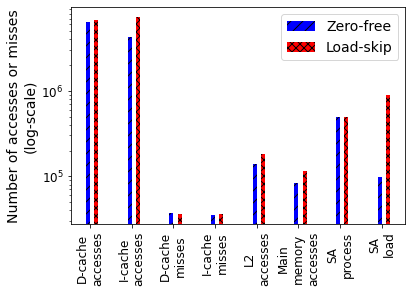

In [91]:
# Filter the rows based on the specified conditions
condition = (zf_df['sparsity'] == 90) & (zf_df['transformer_model'] == 'ViT-B32')
filtered_df = zf_df[condition]

# Calculate the average values based on 'iteration'
avg_values = filtered_df.groupby(['acceleration_method']).mean().reset_index()


# Get the values for 'Row-wise' and 'Block-wise' acceleration methods
zero_free_values = avg_values[avg_values['acceleration_method'] == 'ZF']
load_skip_values = avg_values[avg_values['acceleration_method'] == 'Block-wise']

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))

# Set the bar width and positions
bar_width = 0.1
bar_positions = range(1)


# Set color and hatch patterns for 'Row-wise' and 'Block-wise'
zero_free_color = 'blue'
load_skip_color = 'red'
zero_free_hatch = '//'
load_skip_hatch = 'xxx'

# Plot the bars for each column in column_names
for i, column_name in enumerate(columns):
    # Plot the bars for 'Row-wise' acceleration method
    ax.bar([pos + i for pos in bar_positions], zero_free_values[column_name], capsize=5, width=bar_width, label='Zero-free' if i == 0 else '', color=zero_free_color, hatch=zero_free_hatch)

    # Plot the bars for 'Block-wise' acceleration method
    ax.bar([pos + i + 0.2 for pos in bar_positions], load_skip_values[column_name], width=bar_width, capsize=5, label='Load-skip' if i == 0 else '', color=load_skip_color, hatch=load_skip_hatch)

# Set the x-axis labels based on 'iteration'
ax.set_xticks([pos + bar_width / 2 for pos in range(len(columns))])
ax.set_xticklabels([x.replace(" ", "\n") for x in columns], rotation=90, fontsize=14)

# Set the y-axis label
ax.set_ylabel('Number of accesses or misses\n(log-scale)', fontsize=14)

ax.set_yscale('log')

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(fontsize=14)

plt.savefig('output/acceleration_methods_mem_s90.png', bbox_inches='tight', dpi=300)

In [39]:
zf_df[zf_df['transformer_model'] == 'bert-base']

,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.switch_cpus.op_class_0::MemWrite,system.switch_cpus.op_class_0::CusAluProcess,system.switch_cpus.op_class_0::CusAluParamWrite,system.switch_cpus.op_class_0::CusAluQueue,system.switch_cpus.idleCycles,transformer_model,acceleration_method,architecture,sparsity,iteration


## MHA, Non-GEMM

In [26]:
MHA_df = df[df['layer'] == ""].copy()
matching_rows = df[(df['layer'] == 'FF') &
                   (df['transformer_model'] == 'Bert-base') &
                   (df['acceleration_method'].isin(['Block-wise', 'Row-wise'])) &
                   (df['architecture'] == 'SA16x16') &
                   (df['sparsity'].isin([0, 50]))].copy()
MHA_df['head'] = MHA_df['model'].apply(lambda x: int(x.split(' ')[-2][1:]))
MHA_df['component'] = MHA_df['model'].apply(lambda x: x.split(' ')[-1])

matching_rows['head'] = -1
matching_rows['component'] = 'FF'
MHA_df = MHA_df.append(matching_rows, ignore_index=True)
MHA_df

/tmp/ipykernel_6555/2152066487.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MHA_df = MHA_df.append(matching_rows, ignore_index=True)


,model,layer,sim_seconds,sim_ticks,system.mem_ctrls.num_reads::total,system.mem_ctrls.num_writes::total,system.cpu.dcache.overall_hits::total,system.cpu.dcache.overall_misses::total,system.cpu.dcache.overall_miss_latency::total,system.cpu.dcache.overall_accesses::total,...,system.switch_cpus.op_class_0::CusAluParamWrite,system.switch_cpus.op_class_0::CusAluQueue,system.switch_cpus.idleCycles,transformer_model,acceleration_method,architecture,sparsity,iteration,head,component
0,Bert-base-MHA Row-wise SA16x16 S0 N0 H0 QKV,,0.054193,5.419298e+10,143105.0,26923.0,25665017.0,236547.0,1.071388e+10,25901564.0,...,147456.0,1099008.0,32831187.0,Bert-base-MHA,Row-wise,SA16x16,0,0,0,QKV
1,Bert-base-MHA Row-wise SA16x16 S0 N0 H0 Transpose,,0.006189,6.188671e+09,39431.0,12579.0,1827028.0,43006.0,2.008657e+09,1870034.0,...,0.0,0.0,6493924.0,Bert-base-MHA,Row-wise,SA16x16,0,0,0,Transpose
2,Bert-base-MHA Row-wise SA16x16 S0 N0 H0 QKT,,0.016464,1.646369e+10,61486.0,19986.0,7010784.0,81933.0,3.720238e+09,7092717.0,...,32768.0,244224.0,11727737.0,Bert-base-MHA,Row-wise,SA16x16,0,0,0,QKT
3,Bert-base-MHA Row-wise SA16x16 S0 N0 H0 Softmax,,0.010889,1.088858e+10,52256.0,21185.0,3745400.0,50224.0,2.561849e+09,3795624.0,...,0.0,0.0,8500668.0,Bert-base-MHA,Row-wise,SA16x16,0,0,0,Softmax
4,Bert-base-MHA Row-wise SA16x16 S0 N0 H0 QKTV,,0.016374,1.637424e+10,60585.0,16622.0,6984495.0,77317.0,3.685521e+09,7061812.0,...,32768.0,244224.0,11791129.0,Bert-base-MHA,Row-wise,SA16x16,0,0,0,QKTV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Bert-base Row-wise SA16x16 S50 N0,FF,0.637566,6.375664e+11,333877.0,141127.0,274082708.0,4794418.0,7.843093e+10,278877126.0,...,4718592.0,17629920.0,514546546.0,Bert-base,Row-wise,SA16x16,50,0,-1,FF
124,Bert-base Row-wise SA16x16 S50 N1,FF,0.637513,6.375130e+11,331493.0,141242.0,274089046.0,4793398.0,7.851704e+10,278882444.0,...,4718592.0,17629920.0,514394136.0,Bert-base,Row-wise,SA16x16,50,1,-1,FF
125,Bert-base Row-wise SA16x16 S50 N2,FF,0.637587,6.375873e+11,333663.0,143609.0,274081089.0,4797474.0,7.855676e+10,278878563.0,...,4718592.0,17629920.0,514570731.0,Bert-base,Row-wise,SA16x16,50,2,-1,FF
126,Bert-base Row-wise SA16x16 S50 N3,FF,0.642048,6.420475e+11,353145.0,157554.0,273863517.0,5017228.0,8.277820e+10,278880745.0,...,4718592.0,17629920.0,523682943.0,Bert-base,Row-wise,SA16x16,50,3,-1,FF


In [27]:
MHA_df.loc[MHA_df['head'] != -1, 'sim_seconds'] *= 12
MHA_df.loc[MHA_df['component'] == 'Add/Norm', 'sim_seconds'] *= 12
MHA_df = MHA_df.groupby(['component', 'acceleration_method', 'sparsity'])['sim_seconds'].median().reset_index(name='sim_seconds')

MHA_df = MHA_df[MHA_df['component'] != 'MHA']


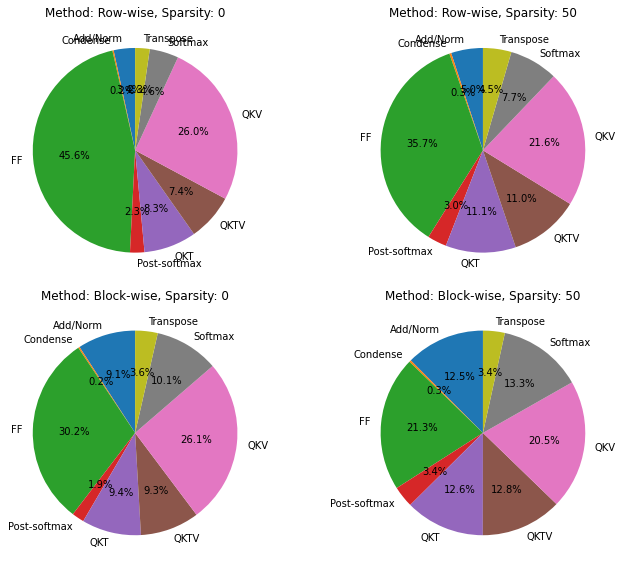

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
combinations = [('Row-wise', 0), ('Row-wise', 50), ('Block-wise', 0), ('Block-wise', 50)]

# Iterate over the combinations and plot the pie charts
for i, (acceleration_method, sparsity) in enumerate(combinations):
    # Filter the dataframe based on the current combination
    filtered_df = MHA_df[(MHA_df['acceleration_method'] == acceleration_method) & (MHA_df['sparsity'] == sparsity)]

    # Compute the proportion of 'sim_seconds' based on 'component'
    proportions = filtered_df.groupby('component')['sim_seconds'].sum() / filtered_df['sim_seconds'].sum()

    # Create a pie chart subplot and plot the proportions
    ax = axes[i // 2, i % 2]
    ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f"Method: {acceleration_method}, Sparsity: {sparsity}")

# Adjust the layout and spacing between subplots
plt.tight_layout()

In [30]:
new_df = MHA_df.copy()

# Aggregate sim_seconds for 'non-GEMM' component
non_gem_components = ['Softmax', 'Post-softmax', 'Transpose', 'Add/Norm']
new_df.loc[new_df['component'].isin(non_gem_components), 'component'] = 'Non-GEMM'

# Aggregate sim_seconds for 'GEMM Prunable' component
gem_components = ['QKV', 'Condense', 'FF']
new_df.loc[new_df['component'].isin(gem_components), 'component'] = 'GEMM Prunable'

# Aggregate sim_seconds for 'GEMM Prunable' component
gem_nonprunable_components = ['QKT', 'QKTV']
new_df.loc[new_df['component'].isin(gem_nonprunable_components), 'component'] = 'GEMM non-Prunable'
new_df = new_df.groupby(['acceleration_method', 'sparsity', 'component']).agg({'sim_seconds': 'sum'}).reset_index()

new_df

,acceleration_method,sparsity,component,sim_seconds
0,Block-wise,0,GEMM Prunable,0.833969
1,Block-wise,0,GEMM non-Prunable,0.275910
2,Block-wise,0,Non-GEMM,0.364950
3,Block-wise,50,GEMM Prunable,0.463446
4,Block-wise,50,GEMM non-Prunable,0.279270
5,Block-wise,50,Non-GEMM,0.359496
6,Row-wise,0,GEMM Prunable,1.906064
7,Row-wise,0,GEMM non-Prunable,0.416544
8,Row-wise,0,Non-GEMM,0.332406
9,Row-wise,50,GEMM Prunable,1.028867


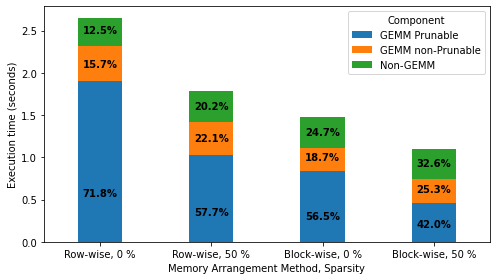

In [31]:
# Assuming your DataFrame is named 'new_df'
# Create a figure
fig, ax = plt.subplots(figsize=(7, 4))

# Define the combinations of 'acceleration_method' and 'sparsity' values
combinations = [('Row-wise', 0), ('Row-wise', 50), ('Block-wise', 0), ('Block-wise', 50)]

# Get the number of combinations
num_combinations = len(combinations)

# Set the width of each bar
bar_width = 0.4

# Calculate the position for each group of bars
x_pos = np.arange(num_combinations)

bars = []
# Iterate over the combinations and plot the stacked bar plots
for i, (acceleration_method, sparsity) in enumerate(combinations):
    # Filter the dataframe based on the current combination
    filtered_df = new_df[(new_df['acceleration_method'] == acceleration_method) & (new_df['sparsity'] == sparsity)]

    # Pivot the dataframe to have components as columns and sim_seconds as values
    pivot_df = filtered_df.pivot(index='acceleration_method', columns='component', values='sim_seconds')

    # Calculate the total sim_seconds for each combination
    total_sim_seconds = pivot_df.sum(axis=1).values[0]


    # Calculate the current x position for the group of bars
    current_x_pos = 0.5-i/bar_width

    # Plot the stacked bar plot
    bar = pivot_df.plot(kind='bar', stacked=True, width=bar_width, ax=ax, position=0.5-i/bar_width, legend=False)

    # bars.append(bar)
    for container in bar.containers[-3:]:
        # Get the height of each segment
        segment_heights = [rect.get_height() for rect in container]

        # Add the labels to the segments
        for j, rect in enumerate(container):
            proportion = segment_heights[j] / total_sim_seconds
            ax.annotate(f'{proportion:.1%}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 4),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                        color='black', fontsize=10, fontweight='bold')


# Set the x-axis labels and ticks
ax.set_xticks(x_pos)
ax.set_xticklabels([f"{comb[0]}, {comb[1]} %" for comb in combinations],  rotation=0)
ax.set_xlim(-0.5,3.5)
ax.set_xlabel('Memory Arrangement Method, Sparsity')
ax.set_ylabel('Execution time (seconds)')
# ax.set_title('Stacked Bar Plot')

# Combine the legends of all the bars into a single legend
handles, labels = bar.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], title='Component')

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.savefig('././output/gemm_non_gemm.png', bbox_inches='tight', dpi=300)

In [38]:
non_gemm_df = MHA_df[(MHA_df['component'].isin(['Softmax', 'Transpose', 'Add/Norm'])) & (MHA_df['sparsity']==0)]

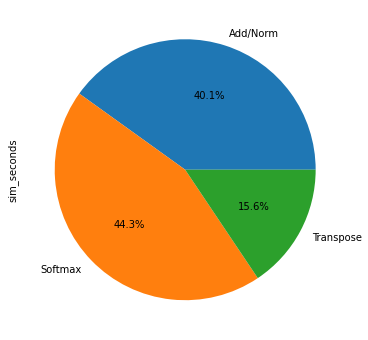

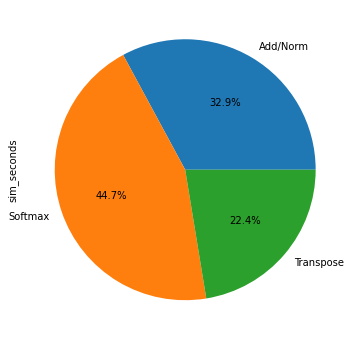

In [46]:
# Assuming your DataFrame is named 'non_gemm_df'
# Filter the DataFrame for 'Block-wise' and 'Row-wise' acceleration methods
blockwise_df = non_gemm_df[non_gemm_df['acceleration_method'] == 'Block-wise']
rowwise_df = non_gemm_df[non_gemm_df['acceleration_method'] == 'Row-wise']

# Create the pie chart for 'Block-wise' acceleration method
blockwise_pie = blockwise_df.groupby('component')['sim_seconds'].sum()
blockwise_pie_normalized = blockwise_pie / blockwise_pie.sum()
blockwise_pie_normalized.plot.pie(figsize=(6, 6), autopct='%1.1f%%')

# Create the pie chart for 'Row-wise' acceleration method
plt.figure()
rowwise_pie = rowwise_df.groupby('component')['sim_seconds'].sum()
rowwise_pie_normalized = rowwise_pie / rowwise_pie.sum()
rowwise_pie_normalized.plot.pie(figsize=(6, 6), autopct='%1.1f%%')
# plt.figure(figsize=(6, 6))
# plt.pie(rowwise_pie, labels=rowwise_pie.index, autopct='%1.1f%%')
# plt.title("Row-wise - Component Distribution")
# plt.show()

[0 1 2 3 4 5]
[0.149064 0.121632]
[2 3 4 5 6 7]
[0.134832 0.089484]
[4 5 6 7 8 9]
[0.052494 0.060984]


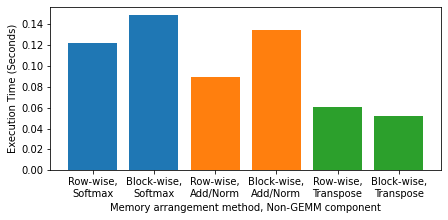

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'non_gemm_df'
# Define the desired order of bars
bar_order = [("Row-wise", "Softmax"), ("Block-wise", "Softmax"), ("Row-wise", "Add/Norm"),
             ("Block-wise", "Add/Norm"), ("Row-wise", "Transpose"), ("Block-wise", "Transpose")]

# Filter the DataFrame for the desired bars
filtered_df = non_gemm_df[(non_gemm_df['acceleration_method'].isin(["Row-wise", "Block-wise"])) &
                          (non_gemm_df['component'].isin(["Softmax", "Add/Norm", "Transpose"])) &
                          (non_gemm_df['sparsity'] == 0)]

# Create a new column to define the custom bar positions
positions = np.arange(len(bar_order))
filtered_df['position'] = [positions[i // 2] for i in range(filtered_df.shape[0])]

# Pivot the DataFrame to have acceleration_method as columns and components as index
pivot_df = filtered_df.pivot(index='component', columns='acceleration_method', values='sim_seconds')

# Sort the pivot DataFrame based on the desired bar order
pivot_df = pivot_df.reindex(index=[x[1] for x in bar_order[::2]])
# pivot_df

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 3))
bar_width = 0.2

# Loop through each component
for i, component in enumerate(pivot_df.index):
    # Get the sim_seconds for each acceleration_method
    sim_seconds = pivot_df.loc[component].values

    # Calculate the x positions for the bars based on the position column
    x_pos = positions + i*2
    print(x_pos)
    print(sim_seconds)

    # Plot the bars
    ax.bar(x_pos[:2][::-1], sim_seconds)

# Set the x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels([f"{x[0]},\n{x[1]}" for x in bar_order])

# Set the axis labels and title
ax.set_xlabel('Memory arrangement method, Non-GEMM component')
ax.set_ylabel('Execution Time (Seconds)')
# ax.set_title('Sim Seconds by Component and Acceleration Method')

plt.savefig('././output/non_gemm.png', bbox_inches='tight', dpi=300)